In [2]:
import gammatone as gm
from gammatone_filterbank import GammatoneFilterbank

import librosa as lb
from librosa.display import waveplot
from librosa.display import specshow
import soundfile as sf

import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
import split_folders

In [3]:
dis_cat = ['Asthma', 'BronchialDeformity', 'COPD', 'Healthy', 'Pneumonia', 'RTI']
audio_loc = '../data/Respiratory_Files/New_Audio/'

In [4]:
test_audio = '../data/Respiratory_Files/New_Audio/train/BronchialDeformity/116_1b2_Pl_sc_Meditron.wav'
# Get example audio file

data, samplerate = sf.read(test_audio, dtype='float32')
wavdata = data.T
data_22k = lb.resample(data, samplerate, 22050)

In [22]:
print(type(data_22k))
print(data_22k.shape)

<class 'numpy.ndarray'>
(441001,)


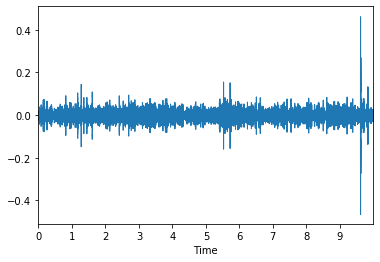

In [25]:
waveplot(data_22k, sr=samplerate)

(0, 9000)

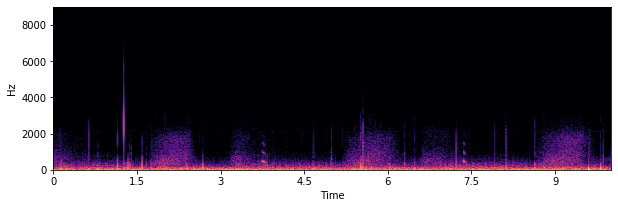

In [33]:
plt.figure(figsize=(10,3))
src_ft = lb.stft(data_22k)
src_db = lb.amplitude_to_db(abs(src_ft))
specshow(src_db, sr=samplerate, x_axis='time', y_axis='hz')
plt.ylim(0, 9000)

In [34]:
def convert_24_bit_to_spectrogram_images(file):
    ''' 
        Converts 24-bit audio file to spec image
        Input file MUST includes path
        Saves the file to a png image in the same directory
    '''

    data, samplerate = sf.read(file, dtype='float32')
    data = data.T
    data_22k = lb.resample(data, samplerate, 22050)
    plt.figure(figsize=(10,3))
    src_ft = lb.stft(data_22k)
    src_db = lb.amplitude_to_db(abs(src_ft))
    specshow(src_db, sr=samplerate, x_axis='time', y_axis='hz')
    plt.ylim(0, 9000)
    
    filename_img = file.split('.wav')[0]
    plt.savefig(filename_img + '.png')
    plt.close()

In [35]:
def is_wav(filename):
    '''
        Checks if files are .wav files
        Utility tool in converting wav to png files
    '''
    return filename.split('.')[1] == 'wav'

In [39]:
#RUN ONLY ONCE
#split_folders.ratio(audio_loc, output=audio_loc, seed=1337, ratio=(0.8, 0.2))

In [42]:
train_loc = '../data/Respiratory_Files/New_Audio/train/'
val_loc = '../data/Respiratory_Files/New_Audio/val/'

In [43]:
for cat in dis_cat:
    files = [f for f in listdir(train_loc + cat) if isfile(join(train_loc + cat, f))]
    for f in files:
        if is_wav(f):
            convert_24_bit_to_spectrogram_images(train_loc + cat + '/' + f)

In [54]:
for cat in dis_cat:
    files = [f for f in listdir(val_loc + cat) if isfile(join(val_loc + cat, f))]
    for f in files:
        if is_wav(f):
            convert_24_bit_to_spectrogram_images(val_loc + cat + '/' + f)

In [19]:
import pandas as pd

diag = pd.read_csv('../data/Respiratory_Files/patient_diagnosis.csv', names=['p_id', 'diagnosis'])
diag.head()

,p_id,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [20]:
diag['diagnosis'] = diag['diagnosis'].map({'LRTI': 'RTI', 'URTI': 'RTI', 
                                           'Bronchiectasis': 'BronchialDeformity', 
                                           'Bronchiolitis': 'BronchialDeformity', 
                                           'Healthy': 'Healthy',
                                           'Pneumonia': 'Pneumonia',
                                           'COPD': 'COPD',
                                           'Asthma': 'Asthma'})
diag.head()

,p_id,diagnosis
0,101,RTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,RTI


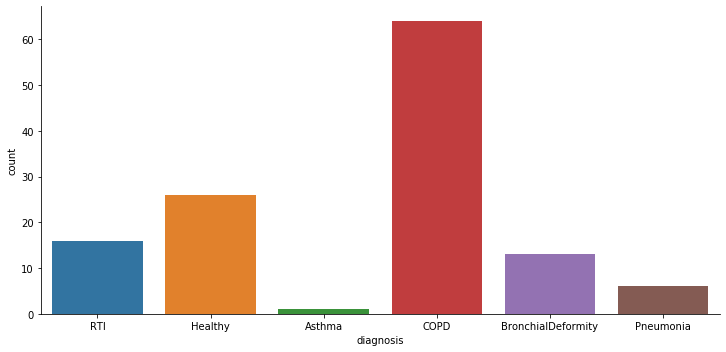

In [39]:
import seaborn as sns

sns.catplot(x="diagnosis", kind="count", data=diag, height=5, aspect=2);

In [10]:
#test gtgram
data, samplerate = sf.read(test_audio, dtype='float32')

gm.

AttributeError: module 'gammatone' has no attribute 'plot'

(0, 9000)

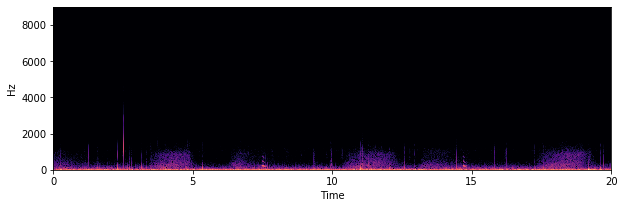

In [5]:
plt.figure(figsize=(10,3))
src_ft = lb.stft(data)
src_db = lb.amplitude_to_db(abs(src_ft))
specshow(src_db, sr=samplerate, x_axis='time', y_axis='hz')
plt.ylim(0, 9000)

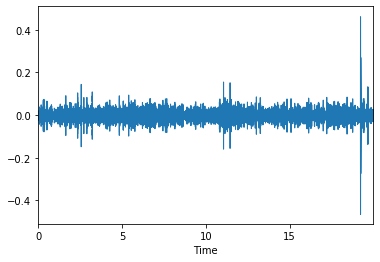

In [6]:
waveplot(data, sr=samplerate)